In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [82]:
df = pd.read_csv('commercial_tree_removals.csv')

In [83]:
good_data = df[~df.isnull().any(axis=1)]
good_data = good_data[['LATITUDE','LONGITUDE','COUNCIL_DISTRICT']]
good_data.head()

,LATITUDE,LONGITUDE,COUNCIL_DISTRICT
2,30.192458,-97.729622,2.0
3,30.235984,-97.851082,8.0
5,30.176657,-97.784708,2.0
8,30.251369,-97.709253,3.0
9,30.204767,-97.773727,3.0


In [84]:
# get training data and target data
X = good_data[['LATITUDE','LONGITUDE']]
y = good_data['COUNCIL_DISTRICT']
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.33, random_state=42)

In [85]:
clfr = RandomForestClassifier()
clfr.fit(train_X,train_y)
test_score = clfr.score(test_X,test_y)
train_score = clfr.score(train_X,train_y)
print('Accuracy on Test: {0:.2f}'.format(test_score))
print('Accruacy on Train: {0:.2f}'.format(train_score))

Accuracy on Test: 0.92
Accruacy on Train: 0.99


In [86]:
y_predictions = clfr.predict(X)
cm = confusion_matrix(y, y_predictions)
cm =pd.DataFrame(cm,columns=['1','2','3','4','5','6','7','8','9','10'], index=['1','2','3','4','5','6','7','8','9','10'] )
cm

,1,2,3,4,5,6,7,8,9,10
1,108,0,2,2,0,0,2,0,0,0
2,0,136,2,0,2,0,0,0,0,0
3,3,0,130,0,0,0,0,0,1,0
4,2,0,0,42,0,0,1,0,1,0
5,0,4,0,0,125,0,0,0,0,0
6,0,0,0,0,0,153,1,0,0,1
7,1,0,0,2,0,0,135,0,0,1
8,0,0,0,0,2,0,0,85,1,1
9,0,0,1,2,1,0,0,0,211,0
10,0,0,0,0,0,3,0,0,0,141


In [87]:
params = {'max_features':['auto','sqrt','log2',None],'n_estimators':[2,5,10,15,20]}
clfr = RandomForestClassifier()
clf_rand_for = GridSearchCV(clfr,params,cv = 5)

In [88]:
clf_rand_for.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2', None], 'n_estimators': [2, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [89]:
clf_rand_for.best_params_

{'max_features': 'log2', 'n_estimators': 20}

In [90]:
clf_rand_for.best_score_

0.93946360153256703

In [91]:
clfr =clf_rand_for.best_estimator_

In [92]:
y_predictions = clfr.predict(X)
cm = confusion_matrix(y, y_predictions)
cm =pd.DataFrame(cm,columns=['1','2','3','4','5','6','7','8','9','10'], index=['1','2','3','4','5','6','7','8','9','10'] )
cm

,1,2,3,4,5,6,7,8,9,10
1,114,0,0,0,0,0,0,0,0,0
2,0,140,0,0,0,0,0,0,0,0
3,0,0,134,0,0,0,0,0,0,0
4,0,0,0,46,0,0,0,0,0,0
5,0,0,0,0,129,0,0,0,0,0
6,0,0,0,0,0,155,0,0,0,0
7,0,0,0,0,0,0,139,0,0,0
8,0,0,0,0,0,0,0,89,0,0
9,0,0,1,0,0,0,0,0,214,0
10,0,0,0,0,0,0,0,0,0,144


In [93]:
predicted_data = pd.DataFrame()
predicted_data['LATITUDE'] = good_data.LATITUDE
predicted_data['LONGITUDE'] = good_data.LONGITUDE
predicted_data['COUNCIL_DISTRICT'] = y_predictions

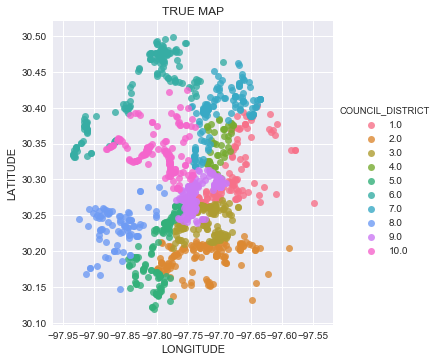

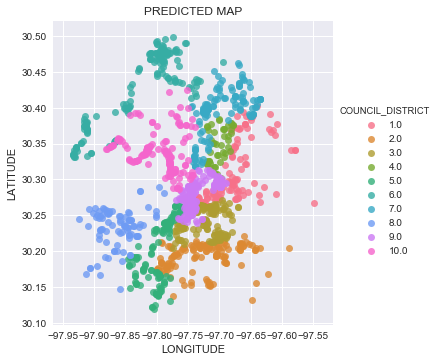

In [105]:

sns.lmplot('LONGITUDE','LATITUDE', fit_reg=False,data =good_data,hue= 'COUNCIL_DISTRICT')
plt.title("TRUE MAP")
plt.savefig('True.png')
sns.lmplot('LONGITUDE','LATITUDE', fit_reg=False,data =predicted_data,hue= 'COUNCIL_DISTRICT')
plt.title("PREDICTED MAP")
plt.savefig('Predicted.png')
plt.show()


In [47]:
#from sklearn.externals import joblib
#joblib.dump(clfr,'randomforestclf.pkl')